In [1]:
%cd ..

C:\Users\susanne\git\binarybeech


In [2]:
import pandas as pd
import numpy as np
import binarybeech.binarybeech as bb
import binarybeech.utils
import matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.INFO)


# Penguins dataset

In [3]:

df_penguins = pd.read_csv("data/penguins.csv")
df_penguins.columns

Index(['rowid', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [4]:
df_penguins

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [5]:

c_penguins = bb.CART(df_penguins,"species",["island","bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g","sex"],metrics_type="classification")

In [6]:
c_penguins.create_tree()

A tree with 13 leafs was created


In [7]:
c_penguins.validate()

{'precision': array([1., 1., 1.]),
 'recall': array([1., 1., 1.]),
 'F-score': 1.0,
 'accuracy': 1.0}

In [8]:
c_penguins.prune()


{'alpha': [0,
  0.0014534883720930215,
  0.0014534883720930239,
  0.0029069767441860465,
  0.007267441860465106,
  0.00872093023255814,
  0.008720930232558143,
  0.023255813953488393,
  0.1482558139534884],
 'R': [0.002906976744186043,
  0.005813953488372091,
  0.008720930232558138,
  0.02325581395348835,
  0.03197674418604649,
  0.04069767441860463,
  0.06395348837209303,
  0.21220930232558144,
  0.5581395348837209],
 'n_leafs': [11, 9, 8, 6, 5, 4, 3, 2, 1]}

In [9]:
c_penguins.create_tree()
c_penguins.prune(alpha_max=5e-3)

A tree with 13 leafs was created


{'alpha': [0,
  0.0014534883720930215,
  0.0014534883720930239,
  0.0029069767441860465],
 'R': [0.002906976744186043,
  0.005813953488372091,
  0.008720930232558138,
  0.02325581395348835],
 'n_leafs': [11, 9, 8, 6]}

A tree with 13 leafs was created
A tree with 13 leafs was created


C:\Users\susanne\git\binarybeech\binarybeech\metrics.py:86: RuntimeWarning: invalid value encountered in true_divide
  return np.diag(m) / np.sum(m, axis=0)


A tree with 13 leafs was created
A tree with 11 leafs was created
A tree with 12 leafs was created


INFO:binarybeech.binarybeech:beta_best: 0.0020555429685655455


A tree with 11 leafs was created
A tree with 13 leafs was created


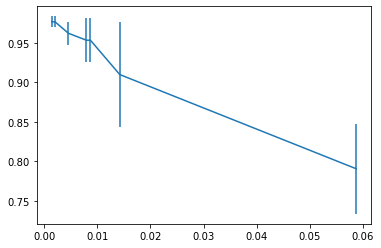

In [10]:
c_penguins.train()

In [11]:

binarybeech.utils.print_tree(c_penguins.tree)

flipper_length_mm<204.81
├── False:island in ('Biscoe',)
│   ├── False:bill_length_mm<44.34
│   │   ├── False:Chinstrap
│   │   └── True: Adelie
│   └── True: Gentoo
└── True: bill_length_mm<44.64
    ├── False:island in ('Dream',)
    │   ├── False:Adelie
    │   └── True: Chinstrap
    └── True: bill_length_mm<42.26
        ├── False:sex in ('female',)
        │   ├── False:Adelie
        │   └── True: Chinstrap
        └── True: Adelie



In [12]:
c_penguins.validate()

{'precision': array([1.        , 0.98529412, 0.98387097]),
 'recall': array([0.98064516, 1.        , 1.        ]),
 'F-score': 0.9915635081070318,
 'accuracy': 0.9912790697674418}